In [1]:
import os
import inspect
import pickle as pkl

In [2]:
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
datadir = os.path.join(parentdir, "experiments/data/datasets")

models = {}

for filedir in os.listdir(datadir):
    fullpath = os.path.join(datadir, filedir)
    with open(fullpath, 'rb') as f:
        models[fullpath] = pkl.load(f) 

In [23]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import MultipleLocator
from IPython.display import HTML

In [4]:
print(models.keys())

dict_keys(['/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_2D_osc_835A89DD81D04849A3DA885C7B79B148.pkl', '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_1D_B1F515581A0A478A92AF1C58D4345408.pkl', '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_1D_bigger_action_magnitudes_DA3D5A6E36D54F52AC1496D1B46CF555.pkl', '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_2D_9985E1798153438E880A8AD60B9146FE.pkl'])


In [9]:
# key = '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_2D_9985E1798153438E880A8AD60B9146FE.pkl'
key = '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_2D_osc_835A89DD81D04849A3DA885C7B79B148.pkl'
# key = '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/visual_haptic_2D_9985E1798153438E880A8AD60B9146FE.pkl'

img_data = models[key]["img"]
ft_data = models[key]["ft"]
arm_data = models[key]["arm"]
models[key]["config"]

{'n_actions': 2,
 'action_scale': 0.01,
 'initial_qpos': [0.4210615413263448,
  -1.6685631515278796,
  -2.746929932488106,
  -0.29617014014198634,
  1.570470494473659,
  0.4202644449684555],
 'fixed': True,
 'goal_vis': False,
 'enable_ft': True,
 'randomize_init': False,
 'randomize_goal': False,
 'randomize_object': False,
 'is_render': True,
 'goal_threshold': 0.05,
 'controller': 'position',
 'max_episode_steps': 200,
 'render_w': 64,
 'render_h': 64,
 'ball_r': 0.02,
 'gravity': 9.81,
 'frame_skip': 2,
 'timestep': 0.004166666666666667,
 'solver_it': 50,
 'plate_URDF': 'assets/objects/plate.urdf'}

In [53]:
def trajvis(traj):    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,5))
    ft = ft_data[traj]
    img = img_data[traj]
    m = ft.shape[1]
    n = img.shape[0]

    ft = ft.reshape(-1, *ft_data[traj].shape[2:])
    x = np.arange(n * m)
    y0 = ft[:, 0]
    y1 = ft[:, 1]
    y2 = ft[:, 2]
    line0, = ax2.plot(x[0], y0[0], label='x')
    line1, = ax2.plot(x[0], y1[0], label='y')
    line2, = ax2.plot(x[0], y2[0], label='z')
    ax2.set_ylim(-200, 200)
    ax2.set_xlim(0, 500)
    ax2.set_title("Forces")
    ax2.legend()
    y3 = ft[:, 3]
    y4 = ft[:, 4]
    y5 = ft[:, 5]
    line3, = ax3.plot(x[0], y3[0], label='x')
    line4, = ax3.plot(x[0], y4[0], label='y')
    line5, = ax3.plot(x[0], y5[0], label='z')
    ax3.set_ylim(-200, 200)
    ax3.set_xlim(0, 500)
    ax3.set_title("Torques")
    ax3.legend()
    
    ax2.xaxis.set_major_locator(MultipleLocator(32))
    ax3.xaxis.set_major_locator(MultipleLocator(32))
    ax2.grid(which='major', color='#CCCCCC', linestyle='--')
    ax3.grid(which='major', color='#CCCCCC', linestyle='--')
    ax2.tick_params(axis="x", labelsize=8, labelrotation=90)
    ax3.tick_params(axis="x", labelsize=8, labelrotation=90)
    ax2.tick_params(axis="y", labelsize=8)
    ax3.tick_params(axis="y", labelsize=8)
    
    im = ax1.imshow(img[0], animated=True)
    ax1.set_axis_off()

    def update(i, x, y0, y1, y2, y3, y4, y5, 
               line0, line1, line2, line3, line4, line5, im):
        if i % m == 0:
            im.set_array(img[int(i / m)])
        line0.set_data(x[:i], y0[:i])
        line1.set_data(x[:i], y1[:i])
        line2.set_data(x[:i], y2[:i])
        line3.set_data(x[:i], y3[:i])
        line4.set_data(x[:i], y4[:i])
        line5.set_data(x[:i], y5[:i])
        ax1.set_title("Image t = {}".format(int(i / m)), fontsize=20)
        return line0, line1, line2, im

    anim = animation.FuncAnimation(fig, update, frames=(m * n), interval=2, 
                                   fargs=[x, y0, y1, y2, y3, y4, y5, 
                                          line0, line1, line2, line3, line4, line5, im], 
                                   blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


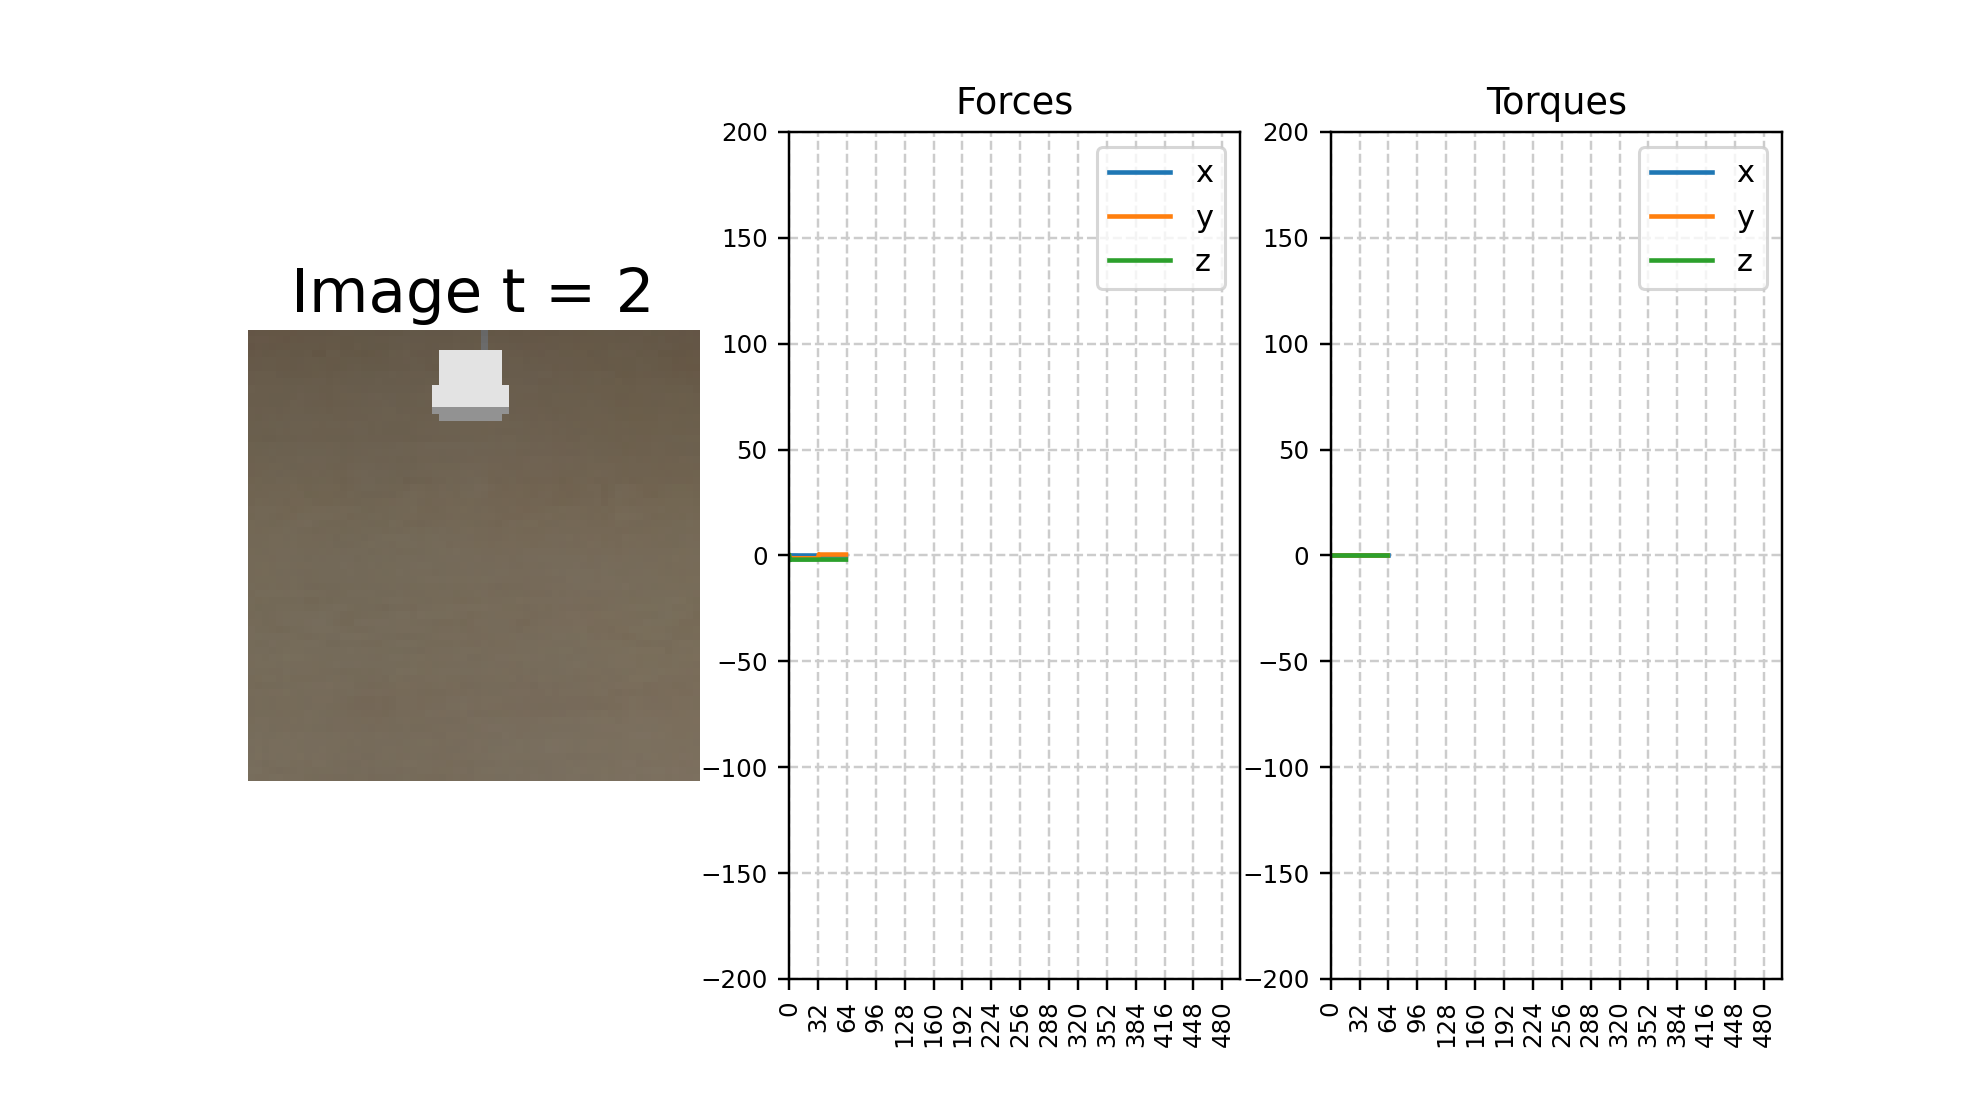

In [54]:
anim = trajvis(40)